# Chapter 3

## 신경망

### 이번장에서는?
- 신경망의 개요
- 신경망이 입력을 식별하는 처리 과정

### 3.1 퍼셉트론에서 신경망으로

- #### 퍼셉트론
![Imgur](https://i.imgur.com/sW1qY7B.png)
다수의 신호를 입력으로 받아 하나의 신호를 출력하는 논리구조이다.

- #### 신경망
<img src="https://i.imgur.com/1U7MYjD.png" width="400">

가장 왼쪽 줄을 입력층, 오른쪽 줄을 출력층, 중간 줄을 은닉충이라고 한다.

은닉충은 사람의 눈에 보이지 않는다.

입력층에서 출력층 방향으로 차례로 0층, 1층, 2층이라고 한다. (여기서 은닉층이 1층, 출력층이 2층)

위 신경망은 3층으로 구성되지만 가중치를 갖는 층은 2개이므로 **2층 신경망**이라고 한다.

### 3.2 활성화함수

- #### 활성화 함수
입력 신호의 총합을 출력 신호로 변환하는 함수

<img src = "https://i.imgur.com/umEilzB.png" width="300">
<img src = "https://i.imgur.com/PRQy6Ye.png" width="350">
<img src = "https://i.imgur.com/WO6Q21T.png" width="150">

입력 값에 가중치 신호를 조합한 결과가 a라는 노드가 되고, 활성화 함수 h()를 통과하여 y라는 노드로 변환된다.

앞서 배운 퍼셉트론에서는 활성화함수로 계단함수를 사용하였다.

활성화 함수를 계단 함수에서 다른 함수로 변경하는 것이 신경망의 세계로 나아가는 열쇠!

- #### 계단함수

입력이 0보다 크면 1을 출력하고 0보다 작거나 같으면 0을 출력하는 함수
<img src = 'https://i.imgur.com/1RJ3MyZ.png' sidth='100'>

- 계단함수 구현하기

In [7]:
import numpy as np
import matplotlib.pylab as plt

In [1]:
def step_function(x):
    if x>0 :
        return 1
    else :
        return 0

In [31]:
def step_function(x):
    y = x>0 #y에 true or False로 반환
    y=y.astype(np.int) #bool type을 int로 바꾸면 true는 1, false는 0
    return y 

x=np.array([3.0,1.0,-1.0])
step_function(x)

array([1, 1, 0])

- 계단함수의 그래프

<function matplotlib.pyplot.show(*args, **kw)>

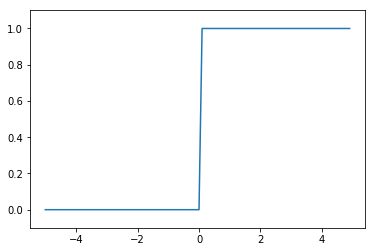

In [27]:
def step_function(x):
    return np.array(x>0, dtype = np.int)

x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show

- #### 시그모이드 함수

신경망에서 자주 이용하는 활성화 함수.

<img src = "https://i.imgur.com/o2WqjmQ.png" width = "300">

- 시그모이드 함수 구현하기

In [15]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [20]:
x=np.array([-1.0,1.0,2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

- 시그모이드 함수 그래프

<function matplotlib.pyplot.show(*args, **kw)>

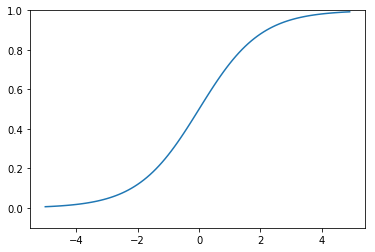

In [28]:
x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1,1)
plt.show

- #### 시그모이드 함수와 계단 함수 비교

계단 함수는 0과 1 중 하나의 값만 돌려주고, 시그모이드 함수는 실수를 돌려준다. 즉, 퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면 신경망에서는 연속적인 실수가 흐른다.

그러나 두 함수 모두 입력이 작을 때는 0에 가까운 값을, 클 때는 1에 가까운 값을 출력하고, 입력이 아무리 작거나 커도 출력은 0에서 1사이 값만 갖는다.

두 함수 모두 **비선형함수**이다.

- #### 비선형함수

신경망에서 활성화 함수로 비선형 함수를 사용해야한다.

그 이유는?

선형함수를 이용하면 신경망의 층을 깊게하는 의미가 없어지기 때문이다.

예를 들어, h(x) = cx 를 활성화함수로 사용한 3층 네트워크는, y(x) = h(h(h(x))) = c*c*c*x 와 같으므로, a=c^3인 h(x) = ax 와 같은 식이다. 즉, 은닉층이 없는 네트워크로 표현할 수 있다.

즉, 선형함수를 이용해서는 신경망을 여러 층으로 구성하는 이점을 살릴 수 없으므로 활성화 함수로는 비선형함수를 사용해야한다.


- #### ReLU 함수

최근에 신경망 분야에서 주로 이용하는 함수이다.
입력이 0을 넘으면 입력을 그대로 출력하고, 0이하이면 0을 출력한다.

<img src = "https://i.imgur.com/Za6n9zO.png" width = "500">

In [30]:
def relu(x):
    return np.maximum(0,x)

### 3.3 다차원 배열의 계산

- #### 행렬의 내적

In [31]:
A=np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [33]:
B=np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [35]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [36]:
np.dot(B,A)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

- #### 신경망의 내적

<img src = "https://i.imgur.com/nSNAq7u.png" width = "700">

In [37]:
X = np.array([1,2])
X.shape

(2,)

In [38]:
W = np.array([[1,3,5],[2,4,6]])
W.shape

(2, 3)

In [39]:
Y = np.dot(X,W)
Y

array([ 5, 11, 17])

### 3.4  3층 신경망 구현하기

<img src = 'https://i.imgur.com/DbPjrr9.png' width = '500'>

입력층은 2개, 첫 번째 은닉층은 3개, 두 번째 은닉층은 2개, 출력층은 2개의 뉴런으로 구성된 3층 신경망

- #### 입력층애서 1층으로 신호 전달

<img src = "https://i.imgur.com/ZToN2jg.png" width = "600">
편향을 뜻하는 뉴런인 1이 추가되었다.
<img src = "https://i.imgur.com/lL69e66.png" width = "400">
<img src = "https://i.imgur.com/pHvVZ66.png" width = "350">

여기서 X는 1✕2, W는 2✕3, B는 1✕3, A는 1✕3 행렬이다.

In [36]:
X=np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([[0.1,0.2,0.3]])

A1 = np.dot(X,W1)+B1


print(A1)


[[0.3 0.7 1.1]]


<img src = "https://i.imgur.com/BtVFitJ.png" width = "500">

은닉층에서의 가중치 합을 a로, 활성화 함수 h()로 변환된 신호를 z로 표기한다.

In [35]:
Z1 = sigmoid(A1)
Z1

array([[0.57444252, 0.66818777, 0.75026011]])

- #### 1층에서 2층으로 신호 전달
<img src = 'https://i.imgur.com/ztc2i4U.png' width ='500'>

In [44]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

A2 = np.dot(Z1,W2)+B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

[[0.51615984 1.21402696]]
[[0.62624937 0.7710107 ]]


- #### 2층에서 출력층으로 전달
<img src = 'https://i.imgur.com/Gp7AjzA.png' width = '500'>

2층에서 출력층으로의 신호 전달도 다른 층과 비슷하지만 활성화 함수만 다르다. 여기에서는 항등함수로 구현해보았다.

In [48]:
def identity_function(x):
    return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3)+B3
Y = identity_function(A3)

print(Y)

[[0.31682708 0.69627909]]


출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정의한다.

예를 들어 회귀에는 항등함수를, 2클래스 분류에는 시그모이드 함수, 다중클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적이다.

- #### 구현 정리

In [58]:
#가중치와 편향을 초기화하고 딕셔너리에 저장
def init_network(): 
    network={}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([[0.1,0.2,0.3]])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

#입력 신호를 출력으로 변환
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = identity_function(a3)
    
    return y

In [59]:
network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y)

[[0.31682708 0.69627909]]


### 3.5 출력층 설계하기

- #### 소프트맥스 함수

분류에서 주로 사용한다.
<img src ='https://i.imgur.com/JYKV2iN.png' width = '200'>
n=출력층의 뉴런 수, y_k = 그 중 k번째 출력, a_k = k번째 입력 신호

- 소프트맥스 함수 구현하기

In [37]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [38]:
a=np.array([1,2,-1])
print(softmax(a))

[0.25949646 0.70538451 0.03511903]


- #### 소프트맥스 함수 구현 시 주의점

소프트맥스 함수는 지수 함수를 사용하므로 값이 쉽게 커지는데, 이 때문에 오버플로 문제가 발생한다.

In [62]:
a=np.array([1010,1000,990])
np.exp(a)/np.sum(np.exp(a))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

<img src = 'https://i.imgur.com/3PxDtFF.png' width='400'>
##### 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과는 변하지 않는다.
오버플로 문제를 해결하기 위해 입력신호의 최댓값을 뺀 값을 사용한다.

In [39]:
a=np.array([1010,1000,990])
c = np.max(a)
np.exp(a-c)/np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [18]:
def softmax(a):
    c=np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

- #### 소프트맥스 함수의 특징

소프트맥스 함수의 출력은 0에서 1사이의 값이고, 출력의 총 합은 1이므로 출력을 확률로 해석할 수 있다.

In [67]:
a = np.array([0.3,2.9,4.0])
y=softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

74%의 확률로 2번째클래스, 25%의 확률로 첫번째 클래스, 1%의 확률로 0번째 클래스다

2번째 원소의 확률이 가장 높으므로 두번째 클래스다.

소프트맥스 함수는 단조 증가 함수이므로 원소의 대소관계는 변하지 않는다.

신경망의 분류에서는 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식하는데, 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다. 즉, 신경망으로 분류(추론)할 때는 출력층의 소프트맥스 함수는 생략해도 된다. (학습을 할때는 소프트맥스 함수 사용)